In [66]:
#I am thankful for this laptop 

# Importing the library

In [67]:
import numpy as np
import pandas as pd
#train_test_split
from sklearn.model_selection import train_test_split
#scaling the library
from sklearn.preprocessing import StandardScaler
#Tensorflow Neural Network
import tensorflow as tf
#metrics
from sklearn.metrics import r2_score
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset 

In [68]:
df=pd.read_csv('/kaggle/input/sales-forecasting/train.csv')
#showing the dataset
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


# Getting the Preliminary Information about the dataset

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Checking for null value in the dataset

In [70]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

# Getting Statistical data 

In [71]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


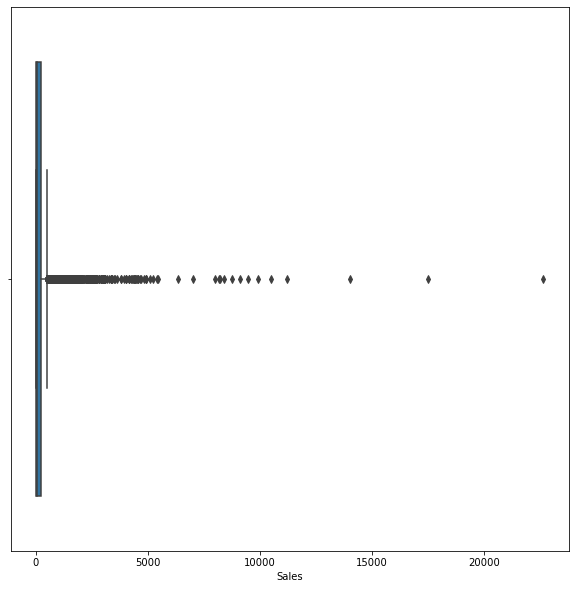

In [72]:
#Checking for outliers in the dataset
plt.figure(figsize=(10,10))
sns.boxplot(x=df['Sales'])
plt.show()

# Creating the Preprocess_input function

In [73]:
def date_encode(df,columns):
    df=df.copy()
    for column in columns:
        df[column]=pd.to_datetime(df[column])
        df[column+'_month']=df[column].dt.month
        df[column+'_year']=df[column].dt.year
        df[column+'_day']=df[column].dt.year
        df=df.drop(column,axis=1)
    return df

In [74]:
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [76]:
def preprocess_input(df):
    df=df.copy()
    #dropping the unnecessary columns
    df=df.drop(['Row ID','Customer Name','Country','Product Name'],axis=1)
    #dropping order id and customer id
    df=df.drop(['Order ID','Customer ID'],axis=1)
    df=date_encode(df,['Order Date','Ship Date'])
    
    onehot_columns=['Ship Mode','Segment','City','State','Region','Postal Code','Category','Sub-Category','Product ID']
    df=onehot_encode(df,onehot_columns)
    #scaling the dataset
    #spitting between x and y
    y=df['Sales']
    x=df.drop('Sales',axis=1)
    #scaling the feature dataset
    scaler=StandardScaler()
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    
    
    
    return x_train,x_test,y_train,y_test

In [77]:
x_train,x_test,y_train,y_test=preprocess_input(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6860, 3102)
(2940, 3102)
(6860,)
(2940,)


# Compiling the Model

In [88]:
#use linear activation function in outputs because it is regression problem for regression problems we use linear activation function
inputs=tf.keras.layers.Input(shape=(3102,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='linear')(x)


# Compiling the Model

In [89]:
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3102)]            0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                198592    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 202,817
Trainable params: 202,817
Non-trainable params: 0
_________________________________________________________________


# #batch_size and epochs

In [92]:
batch_size=100
epochs=100

In [93]:
model.compile(optimizer='adam',loss='mse')
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=epochs,
                 callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/100
55/55 [==============================] - 1s 8ms/step - loss: 227070.2969 - val_loss: 263113.6875
Epoch 2/100
55/55 [==============================] - 0s 5ms/step - loss: 208003.8438 - val_loss: 278108.5625
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 189856.6250 - val_loss: 309084.1250
Epoch 4/100
55/55 [==============================] - 0s 6ms/step - loss: 171647.8438 - val_loss: 359223.8125
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 154892.4219 - val_loss: 439631.4062
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 139293.6094 - val_loss: 560807.0000


In [94]:
model.evaluate(x_test,y_test)

92/92 [==============================] - 0s 2ms/step - loss: 192903.7500


192903.75

In [78]:
x_train

,Order Date_month,Order Date_year,Order Date_day,Ship Date_month,Ship Date_year,Ship Date_day,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,...,Product ID_TEC-PH-10004833,Product ID_TEC-PH-10004875,Product ID_TEC-PH-10004896,Product ID_TEC-PH-10004897,Product ID_TEC-PH-10004908,Product ID_TEC-PH-10004912,Product ID_TEC-PH-10004922,Product ID_TEC-PH-10004924,Product ID_TEC-PH-10004959,Product ID_TEC-PH-10004977
9251,-1.514668,1.135142,1.135142,0.206917,1.118774,1.118774,-0.425282,-0.241012,-0.490735,0.820147,...,-0.020207,-0.010102,-0.022593,-0.026736,-0.026736,-0.014287,-0.022593,-0.017499,-0.014287,-0.030319
2060,0.821826,-1.534071,-1.534071,-0.973917,-1.543681,-1.543681,-0.425282,-0.241012,-0.490735,0.820147,...,-0.020207,-0.010102,-0.022593,-0.026736,-0.026736,-0.014287,-0.022593,-0.017499,-0.014287,-0.030319
2041,-0.346421,-0.644334,-0.644334,-0.383500,-0.656196,-0.656196,-0.425282,-0.241012,-0.490735,0.820147,...,-0.020207,-0.010102,-0.022593,-0.026736,-0.026736,-0.014287,-0.022593,-0.017499,-0.014287,-0.030319
3831,1.113888,-0.644334,-0.644334,1.092542,-0.656196,-0.656196,-0.425282,-0.241012,-0.490735,0.820147,...,-0.020207,-0.010102,-0.022593,-0.026736,-0.026736,-0.014287,-0.022593,-0.017499,-0.014287,-0.030319
6520,-1.806730,1.135142,1.135142,-1.859542,1.118774,1.118774,-0.425282,-0.241012,2.037761,-1.219294,...,-0.020207,-0.010102,-0.022593,-0.026736,-0.026736,-0.014287,-0.022593,-0.017499,-0.014287,-0.030319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4674,-0.054359,0.245404,0.245404,-0.383500,0.231289,0.231289,-0.425282,-0.241012,-0.490735,0.820147,...,-0.020207,-0.010102,-0.022593,-0.026736,-0.026736,-0.014287,-0.022593,-0.017499,-0.014287,-0.030319
2764,-0.346421,1.135142,1.135142,-0.383500,1.118774,1.118774,-0.425282,-0.241012,-0.490735,0.820147,...,-0.020207,-0.010102,-0.022593,-0.026736,-0.026736,-0.014287,-0.022593,-0.017499,-0.014287,-0.030319
4399,-1.222606,0.245404,0.245404,-1.269125,0.231289,0.231289,-0.425282,4.149170,-0.490735,-1.219294,...,-0.020207,-0.010102,-0.022593,-0.026736,-0.026736,-0.014287,-0.022593,-0.017499,-0.014287,-0.030319
1285,-0.346421,0.245404,0.245404,-1.269125,0.231289,0.231289,-0.425282,-0.241012,-0.490735,0.820147,...,-0.020207,-0.010102,-0.022593,-0.026736,-0.026736,-0.014287,-0.022593,-0.017499,-0.014287,-0.030319


In [ ]:
{column:len(x[column].unique()) for column in x.columns}

In [95]:
y_pred=np.squeeze(model.predict(x_test))
r2_score(y_test,y_pred)

0.3273120530526935

In [96]:
y_pred

array([1.5227133e+03, 2.7360554e+00, 3.3007938e+02, ..., 9.8364916e+00,
       1.4427190e+00, 9.4770691e+01], dtype=float32)

In [97]:
y_test

1001    2309.650
8684      21.210
4968     199.980
4107      13.960
4854       8.940
          ...   
8385      11.808
2082      37.440
3033      20.736
796      132.790
3978      84.784
Name: Sales, Length: 2940, dtype: float64